
# Project: Investigate a relationship between weight and player overall rating
 Diving into statistics of the beautiful game 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Football is a game that has taken the hearts of billions around the world, the game is so popular that Fifa has claimed that 1.5 billion people have watched the FIFA World Cup Qatar final of 2022, statics in the other hand started to make their way to the beautiful game <a href='https://www.twenty3.sport/the-evolution-of-football-data/#:~:text=In%20its%20earliest%20days%2C%20in,the%20evolution%20of%20football%20data.'>mid-twentieth century</a>  and nowadays it's an essential part of the game due to its ability to help coaching staff to make decisions around the team. 
 
This project will use the European Soccer Database from Kaggle, the database contains data about teams, matches, and player attributes for several European countries between 2008 to 2016, by using this database and performing data analysis this project will try to find whether or not there is a relationship between player weight and his overall rating, the data analysis will go through 4 main steps:

1) Data wrangling.
2) Data cleaning.
3) Analysing data.
4) conclude the result.

Throughout each step there will be a detailed explanation of the process and any limitation or improvement towards the project w will be included in the conclusion section.  


In [1]:
import warnings
#to ignore futurewarning that may ruin layout
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

The proposed database for this project is extensive, so it is necessary to import only the important data for the analysis. For this purpose <a href='https://sqlitebrowser.org/'>DB</a> has been used since the data is in .sqlite format, both Player and 
Player_attribute tables have been joined together by common key player_api_id, the diagram below was generated by <a href='https://dbdiagram.io/'>DBDiagram</a> shows how both tables are related (note that the player table has more columns but it was simplified for explanatory purposes).
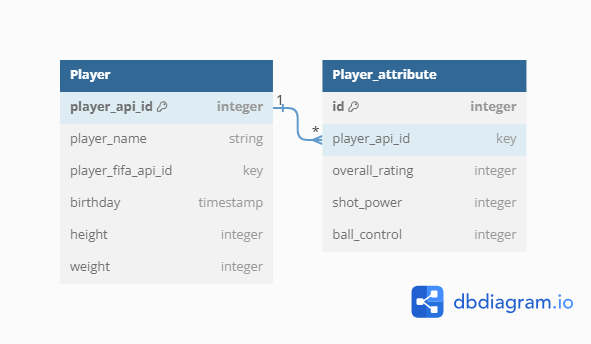
 

In [2]:
#Loading  data sets
df_ply = pd.read_csv("Player.csv")


In [3]:
# total of 49 columns 
df_ply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_fifa_api_id    183978 non-null  int64  
 2   player_api_id         183978 non-null  int64  
 3   date                  183978 non-null  object 
 4   overall_rating        183142 non-null  float64
 5   potential             183142 non-null  float64
 6   preferred_foot        183142 non-null  object 
 7   attacking_work_rate   177109 non-null  object 
 8   defensive_work_rate   183142 non-null  object 
 9   crossing              183142 non-null  float64
 10  finishing             183142 non-null  float64
 11  heading_accuracy      183142 non-null  float64
 12  short_passing         183142 non-null  float64
 13  volleys               181265 non-null  float64
 14  dribbling             183142 non-null  float64
 15  

As can be seen from the previous cell output, the data frame is still extensive and there is no need for all the columns for this project analysis, in the next step the data frame will be cleaned to start data analysis.  


### Data Cleaning 
his process will involve several steps to make data ready for analysis, first as can be seen from the data frame there are several unwanted columns for this analysis, only the following columns have been chosen: player_api_id','date', 'overall_rating', 'height', 'weight', 'birthday', note that there are more columns that describe player performance (E.g. 'finishing') but overall_rating will give more general idea of player overall performance.

After filtering the dataset it's then necessary to clean data to improve the overall quality and accuracy of the data, this involves removing any Nan values, making sure to convert any time-related columns to datetime64 dtype, and dealing with any duplicate rows with the right decision. 

#### cleaning df_ply dataframe
Below is the process of cleaning the data frame, for each step, there will brief explanation about the method and result.

In [4]:
#first cleaning df_ply
# extract needed columns from df_ply dataframe
player = df_ply[['player_api_id','date', 'overall_rating', 'height', 'weight', 'birthday']].copy()
player.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   date            183978 non-null  object 
 2   overall_rating  183142 non-null  float64
 3   height          183978 non-null  float64
 4   weight          183978 non-null  int64  
 5   birthday        183978 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 8.4+ MB


In [5]:
#check for missing values
player.isna().sum()

player_api_id       0
date                0
overall_rating    836
height              0
weight              0
birthday            0
dtype: int64

Note that both 'overall_rating' and 'sprint_speed' have 836 missing values, this can be solved by replacing Nan values with a mean of total values for each column.

In [6]:
#overall_rating/sprint_speed mean
overall_rating_mean = player['overall_rating'].mean()

player['overall_rating'].fillna(overall_rating_mean, inplace=True)
#confrim replacing Nan
player.isna().sum()

player_api_id     0
date              0
overall_rating    0
height            0
weight            0
birthday          0
dtype: int64

The next step for cleaning this data frame will be to change dtype of both 'birthday' and 'date' to datetime format.

In [7]:
  player[['birthday', 'date']] = player[['birthday', 'date']].apply(pd.to_datetime)
  player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   player_api_id   183978 non-null  int64         
 1   date            183978 non-null  datetime64[ns]
 2   overall_rating  183978 non-null  float64       
 3   height          183978 non-null  float64       
 4   weight          183978 non-null  int64         
 5   birthday        183978 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 8.4 MB


The final step of cleaning data would be to check if there are any duplicate rows and potentially remove them.

In [8]:
player[player.duplicated(keep=False)]

,player_api_id,date,overall_rating,height,weight,birthday
84923,32968,2007-02-22,68.600015,185.42,183,1979-12-15
84924,32968,2007-02-22,68.600015,185.42,183,1979-12-15


It seems that there is two duplicate rows with same id, must be remove to avoid affecting quality and accuracy of the analysis.

In [9]:
player.drop_duplicates(inplace=True)
player[player.duplicated(keep=False)]

,player_api_id,date,overall_rating,height,weight,birthday


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question: what is the relationship if any between the player's performance and player's weight?

To answer this question Body Mass Index (BMI) will be used to classify player fat percent (e.g. whether the player is overweighted) instead of using only player weight, this is because it's impossible to classify player fat precent with only weight since players have different body types, different heights..etc.  
a new column 'BMI' will be added to the data frame, <a href='https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm'>BMI</a> to get an indication of player fat percent status, this equation will be used:
<br></br>
$$BMI =  weight(kg)/height(m)^2 $$
<br></br>
This equation will be used to calculate BMI for each row, this will give the analysis a  perspective to answer the research question.

count    183977.000000
mean         23.117425
std           1.335541
min          17.589579
25%          22.175771
50%          23.100858
75%          23.988885
max          30.865728
Name: BMI, dtype: float64


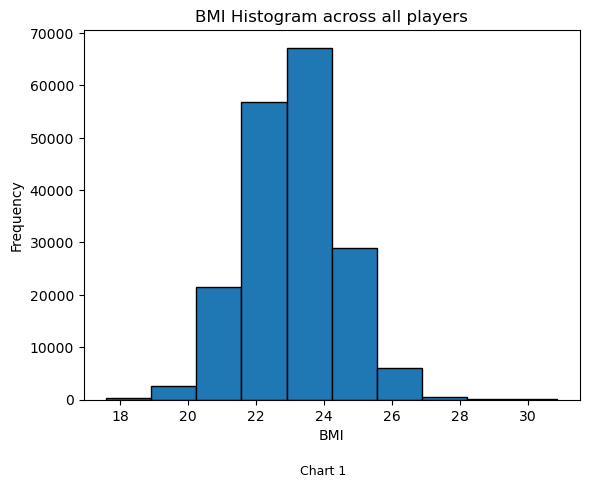

In [10]:

# First converting weight to kg and height to m
player['weight'] = (player['weight'] *  0.45359237)
player['height'] = player['height']/100

#adding new column 'BMI'
player['BMI'] = player['weight']/(player['height']**2)
print(player['BMI'].describe())
plot1 = player['BMI'].plot(kind='hist', title='BMI Histogram across all players',edgecolor='black')
plot1.set_xlabel('BMI')
plt.figtext(0.5,-0.04, "Chart 1", ha="center", va="center", 
fontsize=9)
plot1;



By looking at BMI statistics, the average player has a BMI of 23.11 which is considered to be the perfect BMI for a football player, BMI histogram shows that a BMI of around 22-24 has the higher frequency among all players.

The next step would be to classify each player's BMI into 3 categories [overweight, normal, underweight] and then compare each category with its over_all rating population, this <a href='https://www.researchgate.net/publication/225300751_Anthropometric_measurements_and_body_composition_of_selected_national_athletes?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ'>study</a> proposed the following classification table that will be used:     

|Over-weight | Normal | Under-weight |
| --- | --- | --- |
| BMI > 25 | 20-25 |BMI < 25 |



In [11]:
#the follwing approach has been inspired by https://stackoverflow.com/a/66493830

#create function that will return catogry value based on BMI column
def bmi_class(value):
    if 20 <= value <= 25:
        return "Normal"
    elif value > 25:
        return "Over weight"
    else:
        return "Under weight"

#create new column, assigining each row by value returned by bim_class
player['BMI class'] = player.apply(lambda row: bmi_class(row['BMI']), axis = 1)

#check each catogry counts
player['BMI class'].value_counts()
                                

BMI class
Normal          168715
Over weight      13443
Under weight      1819
Name: count, dtype: int64

The new column 'BMI class' shows that the majority of players lie within 'Normal' as can be expected, 13443 players are overweighted and only 1819 players are underweight, the next step would be to investigate each class with its over_all rating population.

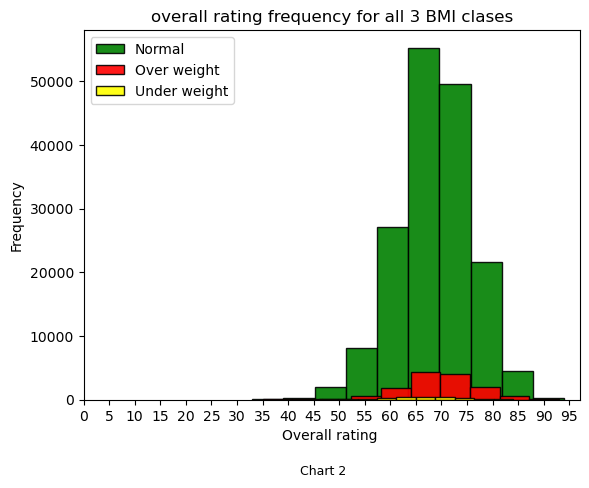

In [12]:
#subset of dataframe for comparision
bmi_comp = player[['overall_rating', 'BMI class']]
#subset for each class 
normal = bmi_comp[bmi_comp['BMI class'] == 'Normal']
over_weight = bmi_comp[bmi_comp['BMI class'] == 'Over weight']
under_weight = bmi_comp[bmi_comp['BMI class'] == 'Under weight']

#plot all 3 classes of BMI on same chart for comparsion
plt.hist(normal['overall_rating'], alpha=0.9, label='Normal',color='green', edgecolor='black')
plt.hist(over_weight['overall_rating'], alpha=0.9, label='Over weight',color='red', edgecolor='black')
plt.hist(under_weight['overall_rating'], alpha=0.9, label='Under weight',color='yellow', edgecolor='black')
bins=np.arange(0, 100, 5)

#adding x,y labels, title and postioning legend
plt.xlabel('Overall rating ')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('overall rating frequency for all 3 BMI clases')
plt.figtext(0.5,-0.04, "Chart 2", ha="center", va="center", 
fontsize=9)
plt.xticks(bins);


Chart 2 shows 3 histograms that represent 3 BIM classes (Normal, overweight, underweight), all 3 histograms overlap with each other to compare the distribution of overall ratings among the 3 classes, all 3 classes are distributed the same to some point but with a different population which has been stated previously, only underweight class has a slightly left-shifted distribution comparing to both normal and overweight class with a majority of underweight distribution between 56-75 overall rating. 

The next investigation will be to count the number of players that have 80+ / 60- overall ratings across all classes and compare between them.

In [13]:
#counting number of players +80
n_8 = normal[normal['overall_rating']>80].count()
o_8 = over_weight[over_weight['overall_rating']>80].count()
u_8 = under_weight[under_weight['overall_rating']>80].count()

#counting number of players -60
n_6 = normal[normal['overall_rating']<60].count()
o_6 = over_weight[over_weight['overall_rating']<60].count()
u_6 = under_weight[under_weight['overall_rating']<60].count()


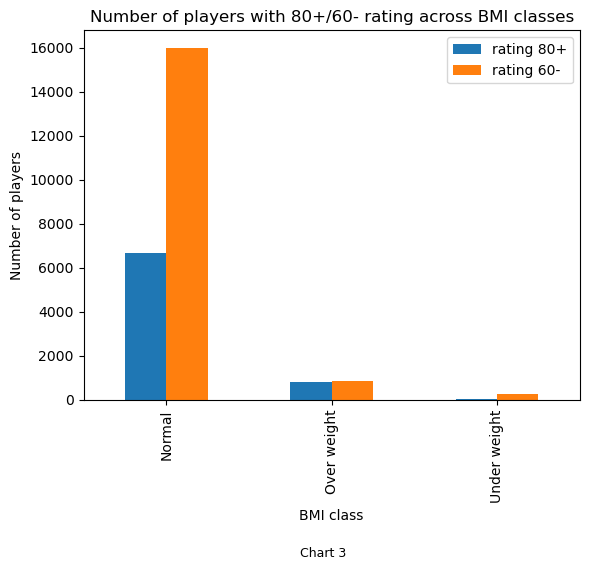

In [14]:
#bar chart to represent both 80+ and 60- player rating across 3 classes / approach from : https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

df = pd.DataFrame({ 
    'BMI  class': ['Normal', 'Over weight', 'Under weight'], 
    'rating 80+': [n_8[0], o_8[0], u_8[0]], 
    'rating 60-': [n_6[0], o_6[0], u_6[0]] 
}) 
  
# plotting graph
bar = df.plot(x="BMI  class",title='Number of players with 80+/60- rating across BMI classes', y=["rating 80+", "rating 60-"], kind="bar");
bar.set_xlabel('BMI class')
bar.set_ylabel('Number of players')
plt.figtext(0.5,-0.21, "Chart 3", ha="center", va="center", fontsize=9);




Chart 3 is a bar chart that compares several players with rating 80 and 60- among all BMI classes ('Normal', 'Overweight', 'Underweight'), it's noted that the 'Normal' BMI class has a significantly higher number of players with a rating of 80 and higher, however 'Normal' also has the highest number of players with rating 60 or lower. 
The following table will be used to discuss the outcome in more detail: 

|              | +80 rating | -60 rating |
|--------------|------------|------------|
| Normal       |       6698 |     16003  |
| Over weight  |       835  |     845    |
| Under weight |       28   |     247    |


As can be seen from the table 'Underweight' class has the lowest number of players with a 60- rating and at the same time the lowest number of players with an 80+ rating, this comparison isn't exactly fair because when looked at the size of population for 'Underweight' class it will be only 1819 player comparing to the population of 168715 and 13443 for 'Normal' and 'Overweight' classes respectively, thus it's hard to assume whether BMI has a direct correlation to overall rating based on the previous analysis.

The final step of this investigation will be to examine any direct correlation between weight and overall rating, a scatter plot will be used to investigate the correlation, in this case, the correlation between BMI rating in general and overall rating will be used in the scatter plot. 

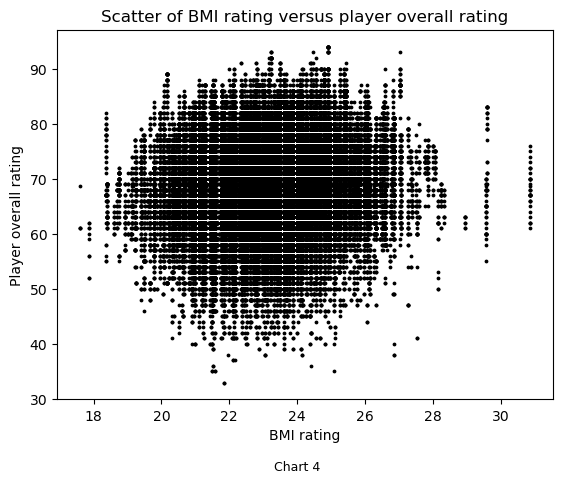

In [15]:
#scatter plot between BMI rating and overall rating
 
plt.scatter(y=player['overall_rating'], x=player['BMI'], s = 3, c = 'black');

plt.xlabel('BMI rating');
plt.ylabel('Player overall rating');
plt.title('Scatter of BMI rating versus player overall rating');
plt.figtext(0.5,-0.03, "Chart 4", ha="center", va="center", fontsize=9);


Chart 4 suggests that there is no direct correlation between BMI (which is an indication of player weight used in this project) and player overall rating, this can be seen from the fact that the point is scattered all over the graph which makes it difficult to determine whether its positive or negative correlation.

<a id='conclusions'></a>
## Conclusions

This project performs a full data analysis process to find out whether the player weight has any relationship with the player's overall rating, the data that has been used in this project is the European Soccer sqlite Database obtained from Kaggle, after doing necessary cleaning for the data:'BMI' was introduced as an indicator to player weight status which then has been divided into 3 categories: normal, overweight and underweight.
After performing the analysis the folwing points conclude the analysis results:

- The average BMI  for a player is 23.117425 which is considered to be 'Normal' based on the classification suggested in this project.
<br></br>
- The count of under-weighted players is the lowest among all categories which is only 1819 players compared to 13443 over-weighted players and 168715 normal weighted players.
<br></br>
- The 'Normal' BMI category contains the highest number of players with an overall rating of 80 and higher (6698 players), on the other hand, the 'Normal' BMI category has the highest number of players with a rating of 60 or lower(16003 players), this may be misleading since the population for all 3 BMI categories is not same.
<br></br>
- There is no relationship between BMI rating and player overall rating, this has been proven in chart 4 (scatter plot) where it was impossible to conclude any positive or negative correlation between the points.

All in all, there was no correlation found between player weight and player overall rating in this project, at least not in the scope of the indicator that has been chosen to represent player weight status 'BMI', this brings the question of whether 'BMI' is the best representation of player weight status, according to a  <a href='https://www.eqoljournal.com/wp-content/uploads/2017/06/EQOL_3_2_d.pdf'> research article</a> done by J.Popadic Gecesa et al suggests that 'BMI' might not be the most accurate representation of body fat percent, it rather suggests using the skinfold thickness method to measure body fat percent 'BMI', however the skinfold thickness method requires the sum of the skinfold sites in and body density which is not available in the dataset used in this project.

#### Limitation and future work:
This project failed to confirm whether there is a relationship between players' weight and overall rating, this is due to data limitations which caused the project to look at player fat precent only with 'BMI' scope.

More work needs to be done to look at weight with a variety of techniques by using more detailed sources of data about player profiles, this can then lead to conclude whether there is any direct relationship between player weight and player performance. 




